In [1]:
# pyface_e_vs_p.ipynb
# Authors: Stephan Meighen-Berger
# Generates some comparison plots between e- and p+ showers

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
# package
sys.path.append("../")
from pyface import PyFace, config

In [3]:
# Location where the images should be stored
str_pics = "../pics/"

In [4]:
def data_generator(energy, events):
    """ Runs pyface for e- and p+ with the given inputs

    Parameters
    ----------
    energy: str
        Energy of the inejcted particle
    events: str
        Number of events to generate

    Returns
    results: list
        Results for e- and p+.
        Each element is another list of pandas data frames
    """
    results = []
    for particle in ["e-", "pi+"]:
        config["scenario"]["events"] = events
        pf = PyFace()
        pf.simulation(energy=energy, particle=particle)
        # Loading data
        str_build_dir = config["general"]["build directory"]
        str_edeposit = 'Shower_h1_Etarget.csv'
        str_track = 'Shower_h1_Ltarget.csv'
        str_pos = 'Shower_h2_Target_XZ.csv'
        str_file_name = str_build_dir + str_edeposit
        dataE = pd.read_csv(str_file_name, skiprows=6)
        str_file_name = str_build_dir + str_track
        dataL = pd.read_csv(str_file_name, skiprows=6)
        str_file_name = str_build_dir + str_pos
        dataPos = pd.read_csv(str_file_name, skiprows=9)
        results.append([dataE, dataL, dataPos])
    return results

In [5]:
simulation_results = data_generator("1 TeV", "100")

--------------------------------------------------------------
Generating the mac file. This tells the geant4 scripts
what the simulation should look like
Removing the old mac file
--------------------------------------------------------------
Running (and compiling) the Geant4 scripts
-- Configuring done
-- Generating done
-- Build files have been written to: /home/meighniac/geant4/projects/showers/build
Consolidate compiler generated dependencies of target showers
[ 11%] Building CXX object CMakeFiles/showers.dir/src/SteppingAction.cc.o
[ 22%] Linking CXX executable showers
[100%] Built target showers

**************************************************************
 Geant4 version Name: geant4-10-07-patch-03    (19-November-2021)
                       Copyright : Geant4 Collaboration
                      References : NIM A 506 (2003), 250-303
                                 : IEEE-TNS 53 (2006), 270-278
                                 : NIM A 835 (2016), 186-225
                  

In [ ]:
colors = ["b", "r"]
particles = ["e-", "pi+"]

Text(0, 0.5, '$Counts$')

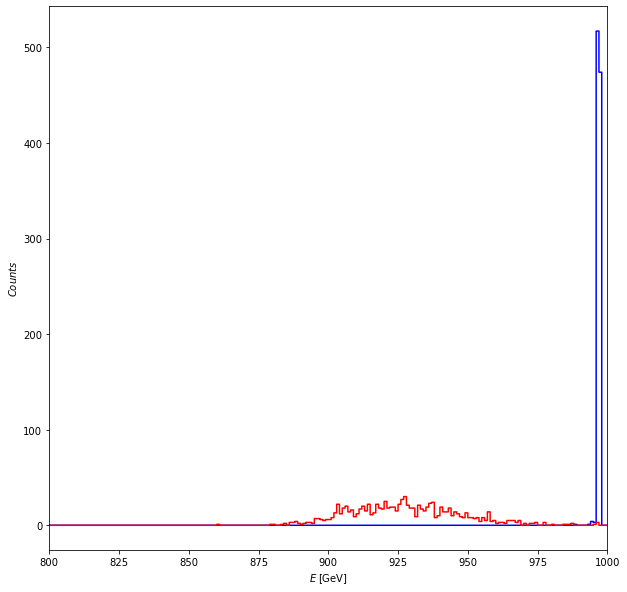

In [ ]:
# The deposited energy in the target volume
lowE_cut = 1
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
for id_p, _ in enumerate(particles):
    ax.step(
        np.linspace(1, 1e3, 1000)[lowE_cut:],
        simulation_results[id_p][0]["entries"][
            (lowE_cut+underflow_cut):(-overflow_cut)],
        color=colors[id_p]
    )
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_xlim(800, 1000)
ax.set_facecolor("white")
ax.set_xlabel(r"$E\;\mathrm{[GeV]}$")
ax.set_ylabel(r"$Counts$")

Text(0, 0.5, '$Counts$')

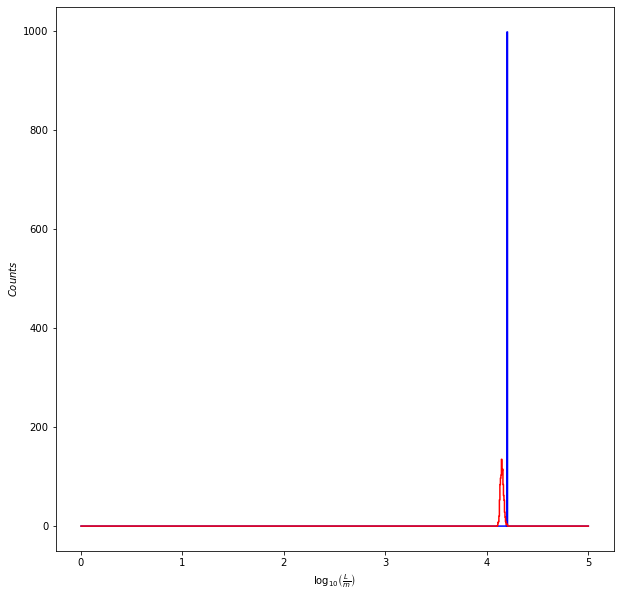

In [ ]:
# Total track length of the shower
lowL_cut = 1
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
for id_p, _ in enumerate(particles):
    ax.step(
        np.linspace(0, 5, 1000)[lowL_cut:],
        simulation_results[id_p][1]["entries"][
            (lowL_cut+underflow_cut):(-overflow_cut)],
        color=colors[id_p]
    )
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$\log_{10}\left(\frac{L}{m}\right)$")
ax.set_ylabel(r"$Counts$")

(-20.0, 0.0)

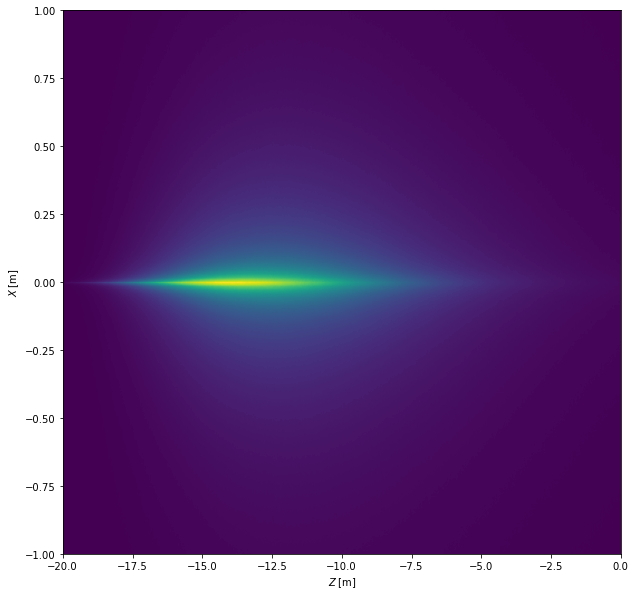

In [ ]:
# The particles over all runs
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
# Fixing up the positional data
pos_vector = np.array(simulation_results[1][2]["entries"]).reshape((1000 + 2, 1000 + 2))
ax.imshow(
    pos_vector[underflow_cut:-overflow_cut, underflow_cut:-overflow_cut].T,
    aspect='auto', extent=(-20, 20, -2.5, 2.5,)
)
ax.autoscale(False)
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$Z\;\mathrm{[m]}$")
ax.set_ylabel(r"$X\;\mathrm{[m]}$")
ax.set_ylim(-1, 1)
ax.set_xlim(-20, 0)

Text(0, 0.5, '$PDF_N$')

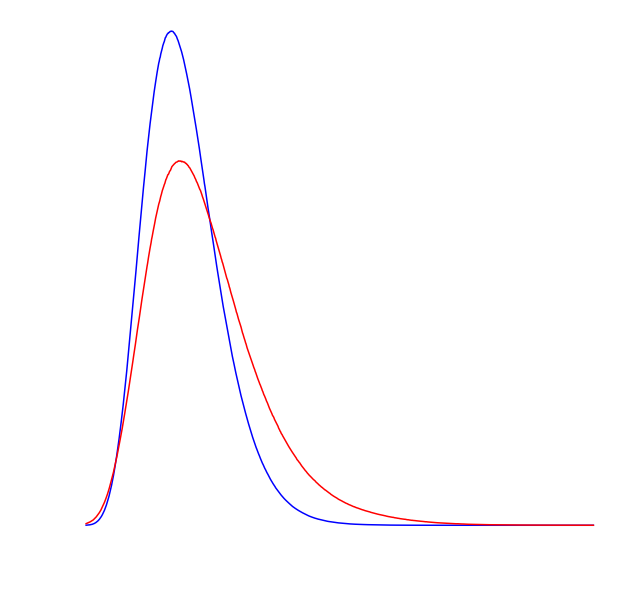

In [ ]:
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
# Constructing the multiplicity projection
for id_p, _ in enumerate(particles):
    pos_vector = np.array(simulation_results[id_p][2]["entries"]).reshape((1000 + 2, 1000 + 2))
    multiplicity = np.sum(
        pos_vector[underflow_cut:-overflow_cut, underflow_cut:-overflow_cut].T,
        axis=0)
    ax.plot(
        np.linspace(0., 40., 1000),
        multiplicity / np.sum(multiplicity),
        color=colors[id_p]
    )
ax.set_xscale("linear")
ax.set_yscale("linear")
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.set_xlabel(r"$Z\;\mathrm{[m]}$")
ax.set_ylabel(r"$PDF_N$")